## Problem Statement Diabetes Risk Prediction

### Context

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

To get a better understanding of this disease among women, we will use  machine learning models that will help to identify patients who are at risk of diabetes by using the dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

### Objective
The data-set aims to answer what are the different factors that can help in identifying whether a person is at risk of diabetes or not.

### Attributes

- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

- BloodPressure: Diastolic blood pressure (mm Hg)

- SkinThickness: Triceps skinfold thickness (mm)

- Insulin: 2-Hour serum insulin (mu U/ml)

- BMI: Body mass index (weight in kg/(height in m)^2)

- Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.

- Age: Age in years

- Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)




## Importing libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
# to impute missing values with KNNImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
# import SMOTE oversampling and other necessary libraries 
from imblearn.over_sampling import SMOTE

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
# For hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Dataset

In [176]:
df=pd.read_csv(r'C:\Users\charo\Downloads\pima-indians-diabetes.csv')

In [177]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [178]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [179]:
df.shape

(768, 9)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Observations:
- There are 9 variables and 768 rows and ll variables are numeric.
- There are no null values in the dataset.

## 1. Exploratory Data Analysis

### Data summary

In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Observations:

- A first approach to the data indicates that there are some abnormalities, the minimum values for glucose, blood pressure, skin thickness, insulin and BMI are zero, which is not feasible. We will get more into detail later but most likely those are unknown values.
- The average number of pregnancies for the group of females participating in the research is 3.85 so, this value can be round up to 4.
- The average age of the group is 33 years old, a minimum of 21 years old and a maximum age of 81 years old.


## 1.1 Univariate Analysis

### a. Number of pregnancies

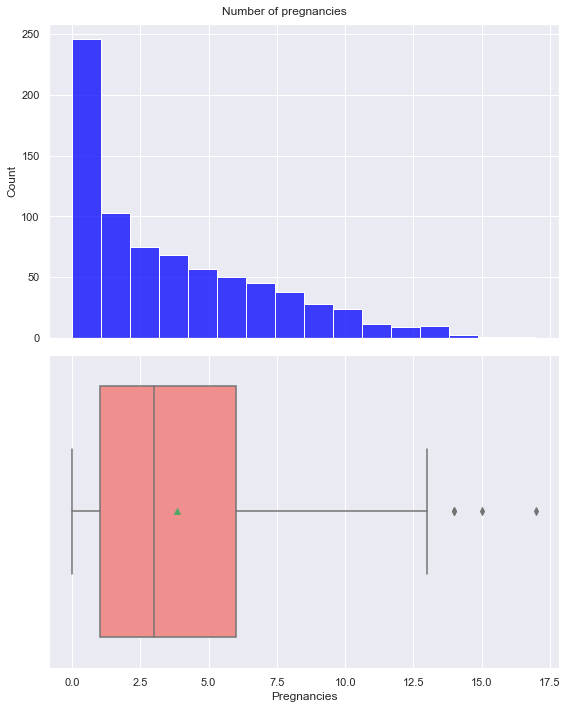

In [182]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Number of pregnancies', fontsize=12)
sns.histplot(data=df, x=df['Pregnancies'], color='blue', ax=axes[0])
sns.boxplot(data= df, x=df['Pregnancies'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()


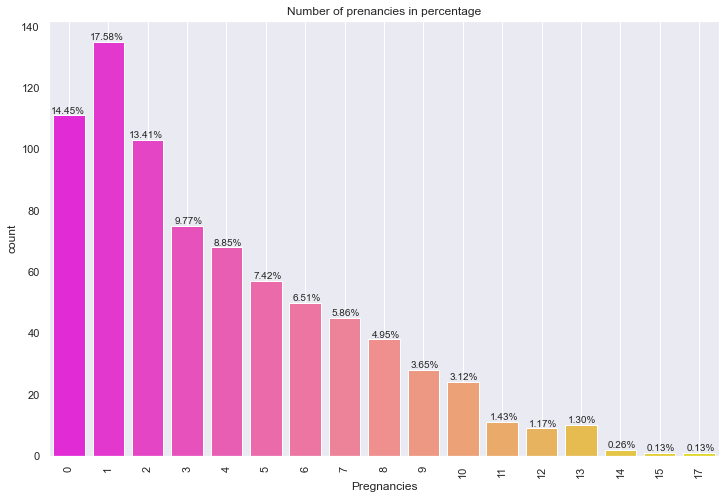

In [184]:
plt.figure(figsize=(12,8)) 
total = float(len(df))  
ax = sns.countplot (data=df,x='Pregnancies', palette='spring')  
plt.grid()  
plt.title( 'Number of prenancies in percentage')  
plt.xticks(rotation=90)
for p in ax.patches: 
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  
plt.show()

#### Observations:
- The distribution is right-skewed, with and average of 4 pregnancies per women. 
- The third quartile of the distribution showed a value of 6 pregancies, so we can see some outliers.
- We can see a great number of individuals with more than 10 pregnancies.

### b. Glucose

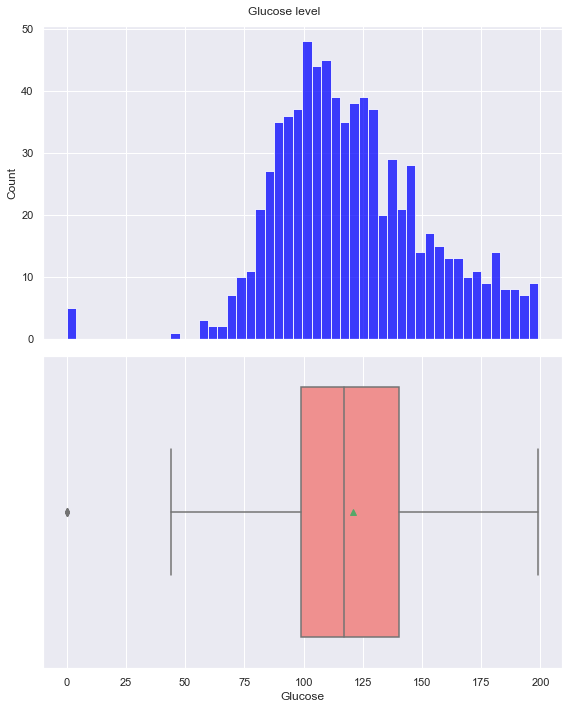

In [185]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Glucose level', fontsize=12)
sns.histplot(data=df, x=df['Glucose'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['Glucose'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- The glucose concentration distribution is almost bell-shape and slightly right skewed. 
- The zero values have to be treated as missing values since glucose concentration cannot be zero.
- The average value is 120 and we can see a maximum of 199 plasma glucose concentration.


#### Treating zero-values

In [186]:
#visualizing value 0 for glucose
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [187]:

df['Glucose']= [np.nan if x==0 else x for x in df['Glucose']]

In [188]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class


#### Observations:
- zero values are converted into np.nan so they do not affect the study. They will be treated later on.

### c. BloodPressure

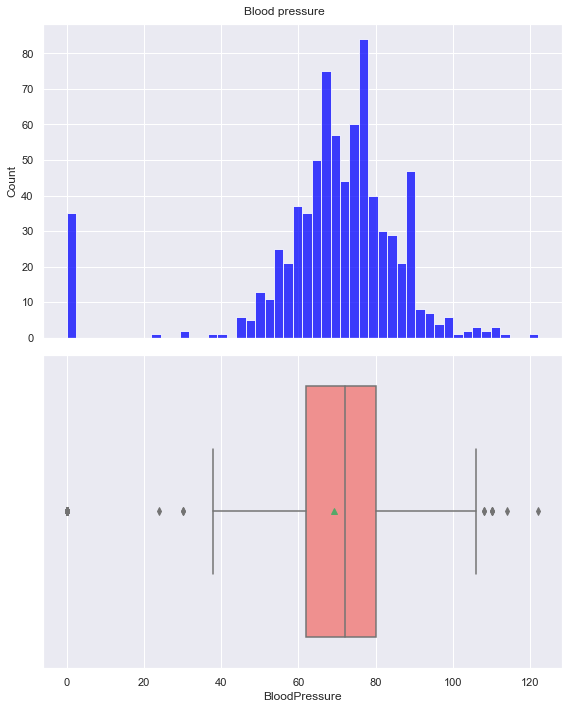

In [189]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Blood pressure', fontsize=12)
sns.histplot(data=df, x=df['BloodPressure'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['BloodPressure'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- There are outliers in both extremes of the distribution.
- The blood pressure distribution is normally distributed.
- The zero-values need to be treated as missing values.
- The average diastolic blood pressure is 69, and the median value is very similar, 75.The requirements are met with a systolic (upper) value under 130 mmHg and a diastolic (lower) value of under 85 mmHg

#### Treating zero-values

In [190]:
#visualizing value 0 for blood pressure
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [191]:

df['BloodPressure']= [np.nan if x==0 else x for x in df['BloodPressure']]

In [192]:
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class


#### Observations:
- we can see a pattern in the data, for individuals with no data for blood pressure, skin thickness and insuline levels.
- The variable BloodPressure does not include any zero-values anymore.

### d. SkinThickness

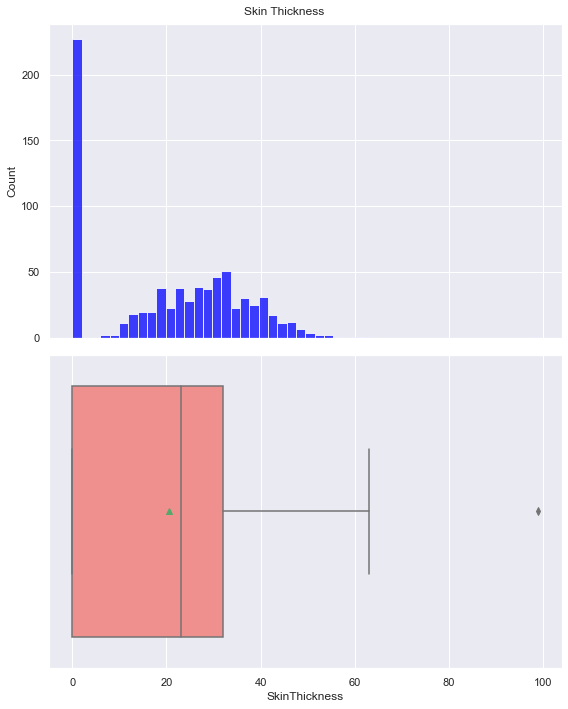

In [193]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Skin Thickness', fontsize=12)
sns.histplot(data=df, x=df['SkinThickness'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['SkinThickness'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- Triceps skinfold (TSF) thickness is an economical and convenient measurement to assess trunk and overall obesity.
- Triceps skinfold can not be zero, therefore, any zero-values will be considered as missing values.
- The mean and median values are very close, near 20 mm but we can also find extreme values such as 99.

#### Treating zero-values

In [194]:
#visualizing value 0 for glucose
df[df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
2,8,183.0,64.0,0,0,23.3,0.672,32,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0
7,10,115.0,NaN,0,0,35.3,0.134,29,0
9,8,125.0,96.0,0,0,0.0,0.232,54,1
10,4,110.0,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,0,0,36.3,0.258,52,1
758,1,106.0,76.0,0,0,37.5,0.197,26,0
759,6,190.0,92.0,0,0,35.5,0.278,66,1
762,9,89.0,62.0,0,0,22.5,0.142,33,0


In [195]:

df['SkinThickness']= [np.nan if x==0 else x for x in df['SkinThickness']]

In [196]:
df[df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class


#### Observations:
- We have converted zero-values into missing values in order to treat them later during the research.

### e. Insulin

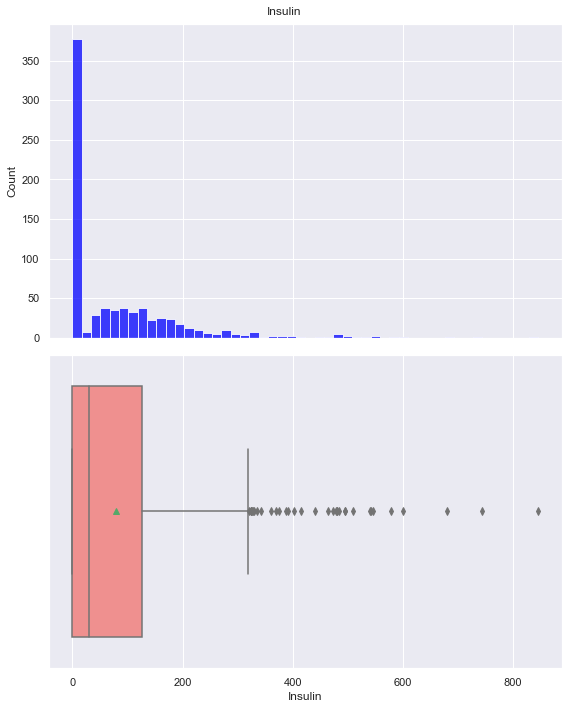

In [197]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Insulin', fontsize=12)
sns.histplot(data=df, x=df['Insulin'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['Insulin'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- Insulin test revealed that there are lots of outliers in the upper extreme of the distribution.
- The average value for the dataset is 70 mu U/ml with a median value of 30 mu U/ml, obviously the outliers are afecting the mean value.
- For this distribution we can find zero-values as well, that will need to be treated as missing values.
    

#### Treating zero-values


In [198]:

df['Insulin']= [np.nan if x==0 else x for x in df['Insulin']]

In [199]:

df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class


#### Observations:
- The zero values in the Insulin distribution are now np.nan values so they will not be counted as zero. WE will treat them as missing values.

### f. BMI

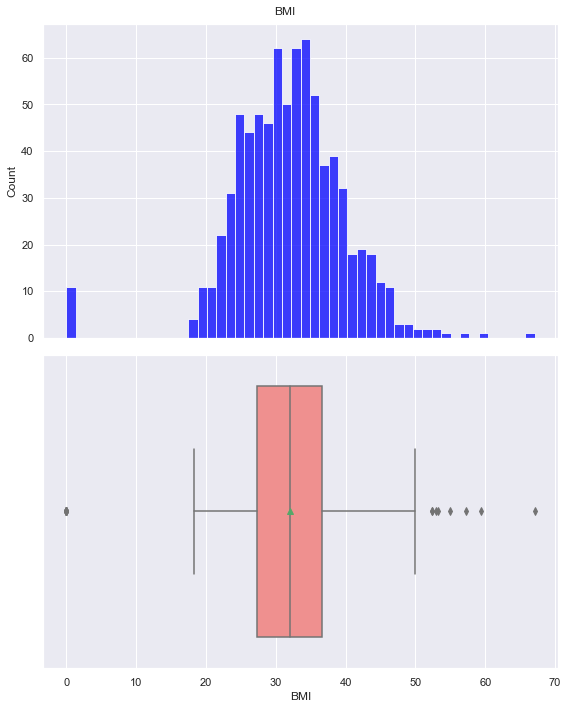

In [200]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('BMI', fontsize=12)
sns.histplot(data=df, x=df['BMI'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['BMI'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- The distribution shows a bell shape, with outliers in the upper extreme.
- There are some zero-values that will be corrected since they are missing values.
- Values above 25 are considered 'Overweight'  and  above 30, we will talk about Obesity.
- Most of the individual of the dataset suffer from weight issues. The average weight is around 32, even the first quartile presents an elevated number, 27.


#### Treating zero-values

In [201]:

df['BMI']= [np.nan if x==0 else x for x in df['BMI']]

In [202]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class


#### Observations:
- All zero-values are been converted into np.nan or missing values for variable BMI.

### g. Pedigree

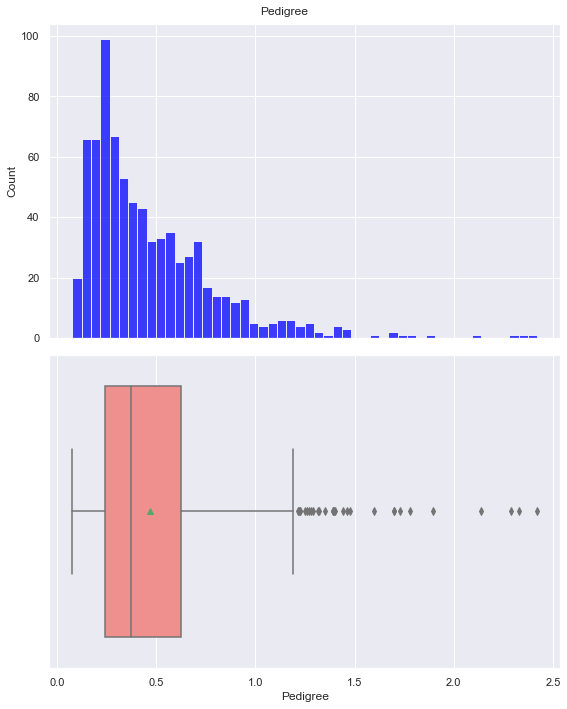

In [203]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Pedigree', fontsize=12)
sns.histplot(data=df, x=df['Pedigree'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['Pedigree'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- The function shows lots of outliers on the upper extreme.
- The 50 per cent of the group show values below 37.

### h. Age

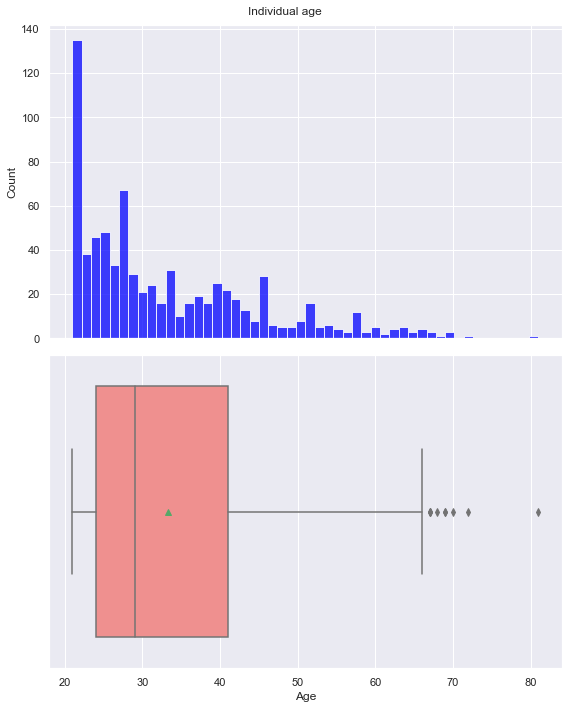

In [204]:
fig, axes=plt.subplots(2,1, figsize=(8,10), sharex=True)
plt.suptitle('Individual age', fontsize=12)
sns.histplot(data=df, x=df['Age'], color='blue', ax=axes[0], bins=50)
sns.boxplot(data= df, x=df['Age'] ,palette='spring', showmeans=True, ax=axes[1])
plt.tight_layout()
plt.show()

#### Observations:
- Most of the women that participated in the research are individual between 21 and 69 years old.
- The 75 per cent of the participant's age was below  41 years old.
- The distribution is highly right skewed.

### i. Target variable Class
#### 0. Non diabetic, 1. Diabetic

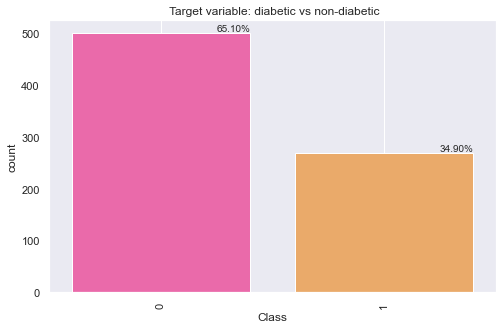

In [205]:
plt.figure(figsize=(8, 5)) 
total = float(len(df))  
ax = sns.countplot (data=df,x='Class', palette='spring')  
plt.grid()  
plt.title( ' Target variable: diabetic vs non-diabetic')  
plt.xticks(rotation=90)
for p in ax.patches: 
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  
plt.show()

#### Observations:
- The target variable is imbalanced since there are more individual that suffer from diabetic in the dataset than non-diabetic.
- Only the 35 percent of the group is ‘healthy’ or not suffering from diabetes. 


## 1.2 Bivariate analysis.

### a. Pairplot

<Figure size 7200x3600 with 0 Axes>

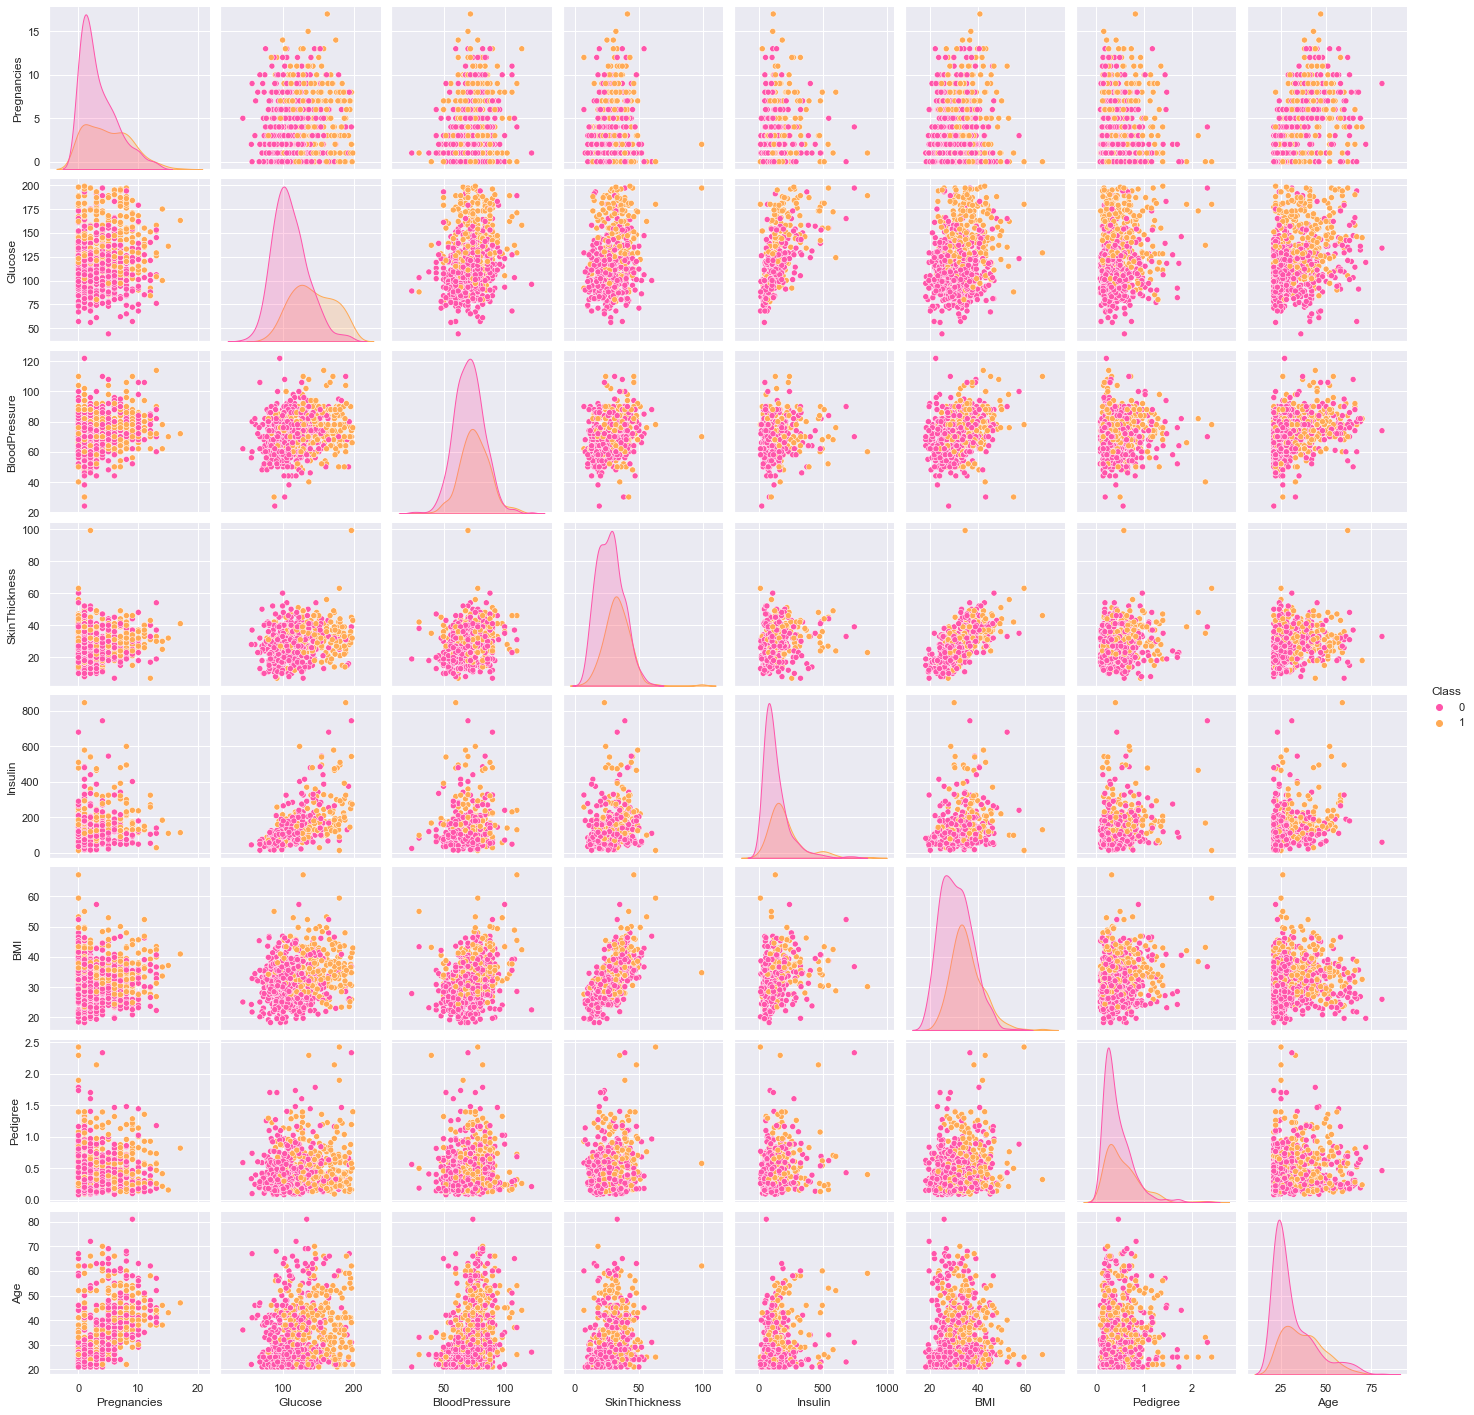

In [206]:
plt.figure(figsize=(100,50))# set size
sns.pairplot(data=df, diag_kind="kde", palette="spring", hue='Class',dropna=True) 
sns.set(font_scale=1)

#### Observations:
- we can see a positive relationship between some variable such as BMI and SkinThinckness, glucose and insulin.
- Variable glucose is the only one that shows separation between diabetic and non-diabetic individuals so it may be one important variable for our classification model.


### b. Heatmap/ coefficient of correlation

<AxesSubplot:>

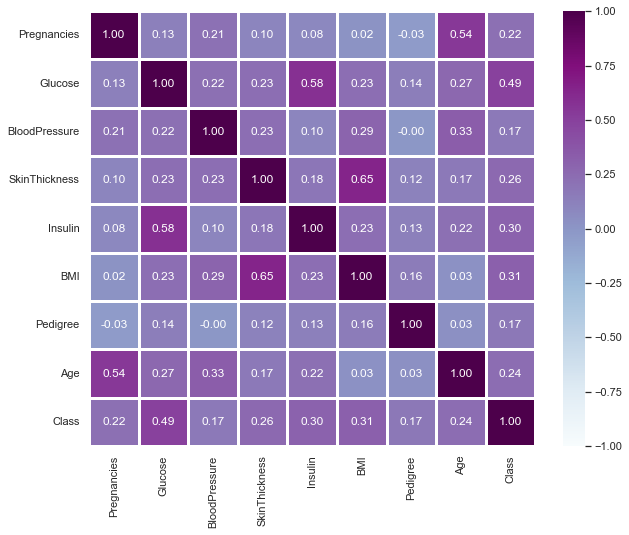

In [209]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="BuPu",linewidths=3, linecolor='white',) 

#### Observations:
- None of the variables shows high correlation.
- The highest positive correlation can be seen among variables BMI and SkinThickness with 0.65.
- Glucose and Insulin also present moderate positive correlation, with 0.58. 
- Pregnancies and age also show a moderate positive correlation as well as glucose and class.

### c. Class vs pregnancies

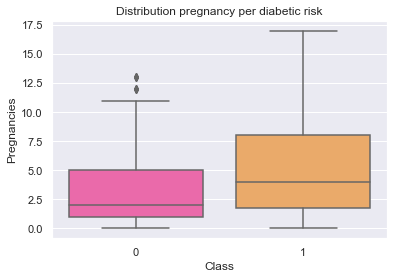

In [213]:
plt.figsize=(10,10)
plt.title('Distribution pregnancy per diabetic risk')
sns.boxplot(data=df, y=df['Pregnancies'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- In general, women with diabetes have more pregnancies than healthy women from the group of study.

### d. Class vs Glucose

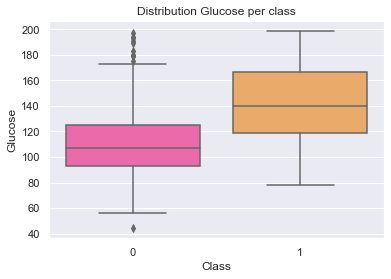

In [216]:
plt.figsize=(10,10)
plt.title('Distribution Glucose per class')
sns.boxplot(data=df, y=df['Glucose'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- The group of women with diabetes shows higher plasma glucose concentration.

### e. Class vs BloodPressure

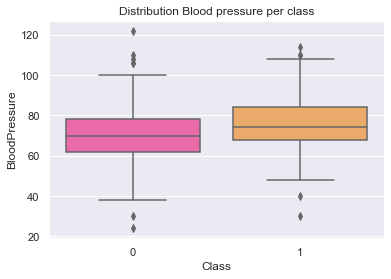

In [217]:
plt.figsize=(10,10)
plt.title('Distribution Blood pressure per class')
sns.boxplot(data=df, y=df['BloodPressure'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- There is not much difference among groups in regards with the blood pressure variable.

In [218]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

### f. Class vs Skin Thickness

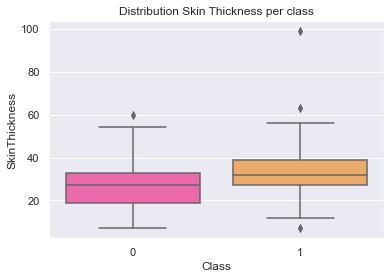

In [222]:
plt.figsize=(10,10)
plt.title('Distribution Skin Thickness per class')
sns.boxplot(data=df, y=df['SkinThickness'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- We can appreciate how the non-diabetic group shows lower results skin thickness.

### g. Class vs Insulin

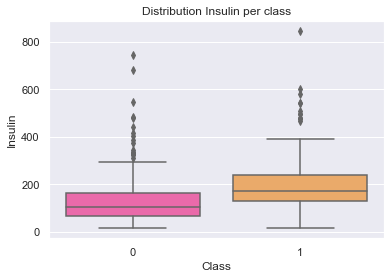

In [223]:
plt.figsize=(10,10)
plt.title('Distribution Insulin per class')
sns.boxplot(data=df, y=df['Insulin'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- Both groups have outliers in the upper extremes of the distribution.
- The group that suffers from diabetes show higher levels of insulin.

### h. Class vs BMI

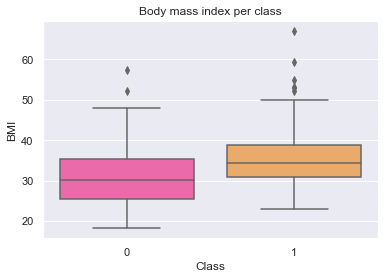

In [224]:
plt.figsize=(10,10)
plt.title('Body mass index per class')
sns.boxplot(data=df, y=df['BMI'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- The body mass index is higher for the group of study that suffers from diabetes.

### i. Class vs Pedigree

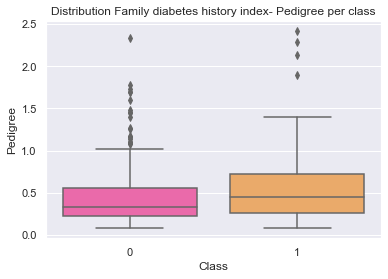

In [226]:
plt.figsize=(10,10)
plt.title('Distribution Family diabetes history index- Pedigree per class')
sns.boxplot(data=df, y=df['Pedigree'],x=df['Class'],palette='spring')
plt.show()

#### Observations:
- Diabetic women have higher pedigree function values.

### j. Class vs Age

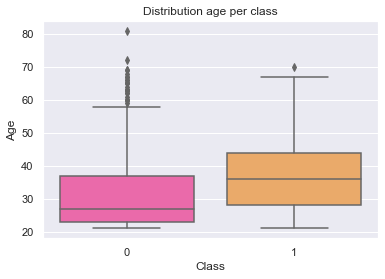

In [227]:
plt.figsize=(10,10)
plt.title('Distribution age per class')
sns.boxplot(data=df, y=df['Age'],x=df['Class'],palette='spring')
plt.show()

#### Observations
- Diabetes seems to be more prominent during middle age and older individuals.
- The non-diabetic group show also lots of outliers, that would be older indivials that have never suffered from diabetes.

## 2. Data pre-processing

- Missing value treatment 
- Outlier detection/treatment 
- Preparing data for modeling

### 2.1 Missing value treatment

In [236]:
df.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Class              0
dtype: int64

In [237]:
# creat a copy berofe transformation of the data set

df1=df.copy()

We are going to use the KNN imputer to fill in the missing values.

In [241]:
#creating data frame to impute values
df1_imp= df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]

In [244]:
df1_imp.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [245]:
imputer=KNNImputer(n_neighbors=5)
Imputed_data=imputer.fit_transform(df1_imp)

In [246]:
#changing array from KNN imputer result to data frame
df1_imputed=pd.DataFrame(Imputed_data)
df1_imputed.columns=df1_imp.columns

In [247]:
df1['Glucose']=df1_imputed['Glucose']
df1['BloodPressure']=df1_imputed['BloodPressure']
df1['SkinThickness']=df1_imputed['SkinThickness']
df1['Insulin']=df1_imputed['Insulin']
df1['BMI']=df1_imputed['BMI']

In [249]:
df1.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

#### Observations:
- There are not missing values in the data set.

### 2.2 Outlier detection/treatment 

In [253]:
# Creating a list to check outliers
list_out= ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Pedigree',
 'Age']
list_out

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Pedigree',
 'Age']

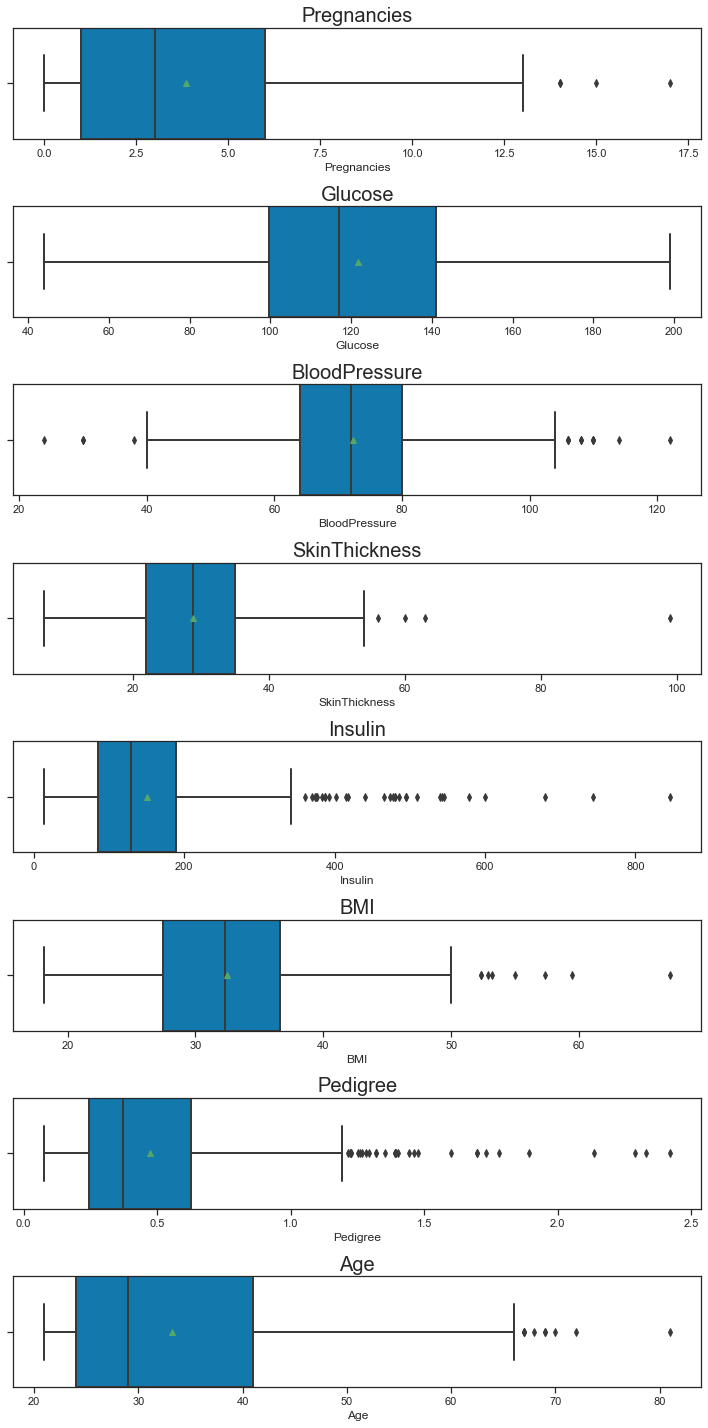

In [255]:

plt.figure(figsize=(10,20))

for i in range(len(list_out)):
    plt.subplot(8, 1, i + 1)
    sns.boxplot(
    x=df1[list_out[i]],showmeans=True, palette ="winter_r",linewidth=2,
        saturation=0.8,
        width=1,whis=1.5)
    plt.title(list_out[i], fontsize=20)
    sns.set_theme(style="ticks")
    plt.tight_layout()

#### Observations:
- There are outliers in most of the upper extremes of the predictors’ distributions, but due to the nature of the research, we are not going to treat them.
- Outliers are part of this research and may clarify and help better understand the behavior of the data.
- To work with outliers, our model is going to be based-tree, so it will not be affected by the outliers.


### 2.3 Preparing data for modeling

In [259]:
# dividing dataset in target (y) variable and predictors(x)
x=df1.drop('Class', axis=1)
y=df1['Class']

In [260]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [262]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Class, dtype: float64

#### Observations:
- All predictor variables are numeric.
- The target variable is imbalanced, so we will need to correct the class imbalance during the model building.

In [263]:
#dividing the data in training and test set on a ratio 70:30. We use the parameter stratify to deal with imbalanced data

x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=1, stratify=y)

In [266]:
x_train.shape, x_test.shape

((537, 8), (231, 8))

In [267]:
y_train.shape, y_test.shape

((537,), (231,))

In [264]:
y_train.value_counts(normalize=True)

0    0.651769
1    0.348231
Name: Class, dtype: float64

In [265]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Class, dtype: float64

#### Observations:
- The x_train contains 8 variables and  537 rows and the x_test contains 8 variables and 231 rows.
- The y_train and y_test contains the same proportions of class 1 and class 0.
- The y_train contains 537 values and y_test contains 231.

## 3. Model evaluation criterion


The model can make wrong predictions if it predicts that a patient doesn't have diabetes and the person has diabetes or predicts that person has diabetes, and the person is healthy.

Predicting a person doesn't have diabetes, and the individual is suffering from diabetes is very undesirable, it can affect the person health severely.On the other hand, making a wrong diagnostic in the opposite way, it will not be so harmful since the patient will be double screened or tested along the diagnostic process.

We are going to focus on maximizing Recall, the greater the Recall higher the chances of minimizing false negatives.  if we predict that a person is not at risk of diabetes, but the individual is at risk, then that patient will be undiagnosed and face future health issues.


### 3.1  Performance Evaluation

In [270]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [282]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [271]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## 4. Model building

In [299]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))



results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))




Cross-Validation Cost:

dtree: 0.5615931721194879
Logistic regression: 0.5668563300142248
Bagging: 0.5516358463726885
GradientBoosting: 0.6365576102418207
AdaBoost: 0.6095305832147938
RandomForest: 0.5779516358463727
XGBoost: 0.5779516358463728


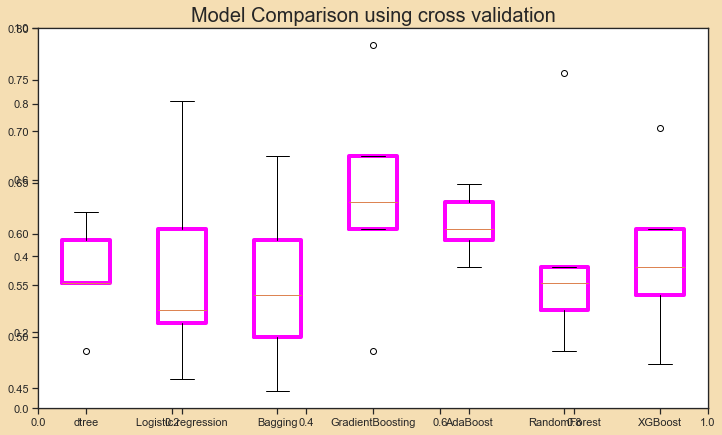

In [302]:
fig=plt.figure(figsize=(12,7),facecolor='wheat')#setting plot size
plt.title('Model Comparison using cross validation',fontsize=20)#adding title
ax=fig.add_subplot(111)# add plots on the same graph
bp=plt.boxplot(results1)# plot cross validation results per model
ax.set_xticklabels(names)#add name labels to each model
for box in bp['boxes']:
    box.set(color='fuchsia', linewidth=4)
plt.show()

#### Observations:
- Cross validation for all the models is not great, we need to address the imbalanced data and use hypertuning in order to achive better results.
- Gradient boosting and adaboost seems to be the best algorithm for the data set.

### 4.1 Hyperparameter tuning on the original data set

### A. Decision tree: dtree_estimator

In [304]:
#We use class_weight to fix the imbalanced data
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

#### MODEL PERFORMANCE

In [305]:
dtree_estimator_train=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
dtree_estimator_train

,Accuracy,Recall,Precision,F1
0,0.772812,0.882353,0.622642,0.730088


In [306]:
dtree_estimator_test=model_performance_classification_sklearn(dtree_estimator, x_test,y_test)
dtree_estimator_test

,Accuracy,Recall,Precision,F1
0,0.722944,0.814815,0.573913,0.673469


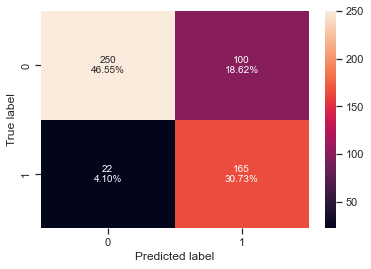

In [310]:
matrix_dtree_train=confusion_matrix_sklearn(dtree_estimator, x_train, y_train)
matrix_dtree_train

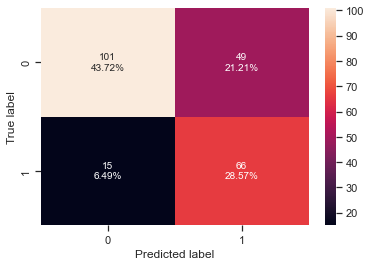

In [312]:
matrix_dtree_test=confusion_matrix_sklearn(dtree_estimator, x_test, y_test)
matrix_dtree_test

#### Observations:
- By tuning the model we can see the recall has improve noteaceably and the misclassification error of women with diabetes as non-diabetic is only a   per cent for the test data.
- Overall, the data for the training set looks a bit better than for the test set, but in terms of recall both sets are very similar.
- We can try other algorithm to improve the model.

### B. Gradient boosting:GB Model

In [350]:
# Boosting algorithm are good for imbalanced data because they do not fluctuate that much.
Model_GB=GradientBoostingClassifier(random_state=1)

param_grid = { "n_estimators": np.arange(100,150,50),"max_depth":(6,8), "learning_rate": [0.03, 0.05,0.02],"ccp_alpha": [0.01,0.003], "subsample":[0.5,0.7,0] }

randomized_cv = RandomizedSearchCV(estimator=Model_GB , param_distributions=param_grid, n_iter=20, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'ccp_alpha': 0.003} with CV score=0.6099573257467995:


In [351]:
Model_GB = GradientBoostingClassifier(random_state=1,subsample= 0.5,ccp_alpha = 0.003, n_estimators= 100, learning_rate= 0.05,max_depth= 6)
Model_GB.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.003, learning_rate=0.05, max_depth=6,
                           random_state=1, subsample=0.5)

#### MODEL PERFORMANCE

In [352]:
Model_GB_train=model_performance_classification_sklearn(Model_GB, x_train,y_train)
Model_GB_train

,Accuracy,Recall,Precision,F1
0,0.882682,0.796791,0.856322,0.825485


In [353]:
Model_GB_test=model_performance_classification_sklearn(Model_GB, x_test,y_test)
Model_GB_test

,Accuracy,Recall,Precision,F1
0,0.735931,0.54321,0.647059,0.590604


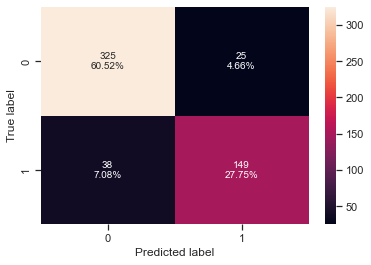

In [355]:
matrix_GB_train=confusion_matrix_sklearn(Model_GB, x_train, y_train)
matrix_GB_train

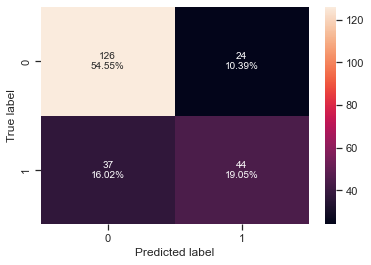

In [354]:
matrix_GB_test=confusion_matrix_sklearn(Model_GB, x_test, y_test)
matrix_GB_test

### Observations:

- The recall for the test set is very mediocre and the model is clearly overfitting since it performs much better on train than test set.
- Confusion matrix shows 16 percent of patients at risk of diabetes misclassified as healthy. 
- There is not direct parameter in the algorithm to fixed the class imbalance so this model is not working well for our data.


### C. Adaboosting: Model_Ada

In [418]:
# AS the base estimator is a decision tree we can change the class weight.
Ada_Model=AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced',max_depth=8,
                       max_leaf_nodes=50, min_samples_leaf=5, random_state=1),random_state=1)
param_grid={"n_estimators": [100,50,150,250,1000],"learning_rate":[0.5,0.05,0.01]}


randomized_cv = RandomizedSearchCV(estimator=Ada_Model , param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=10, random_state=1)

randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
             

Best parameters are {'n_estimators': 150, 'learning_rate': 0.05} with CV score=0.573391812865497:


In [419]:
Model_Ada=AdaBoostClassifier(random_state=1, n_estimators= 150, learning_rate= 0.05)
Model_Ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=150, random_state=1)

#### MODEL PERFORMANCE

In [420]:
Model_Ada_train=model_performance_classification_sklearn(Model_Ada, x_train,y_train)
Model_Ada_train

,Accuracy,Recall,Precision,F1
0,0.817505,0.684492,0.766467,0.723164


In [421]:
Model_Ada_test=model_performance_classification_sklearn(Model_Ada, x_test,y_test)
Model_Ada_test

,Accuracy,Recall,Precision,F1
0,0.735931,0.518519,0.65625,0.57931


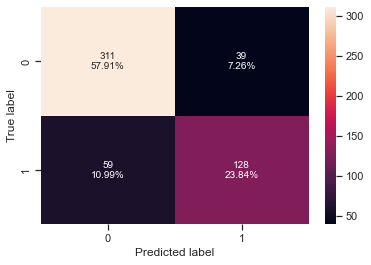

In [422]:
matrix_Ada_train=confusion_matrix_sklearn(Model_Ada, x_train, y_train)
matrix_Ada_train

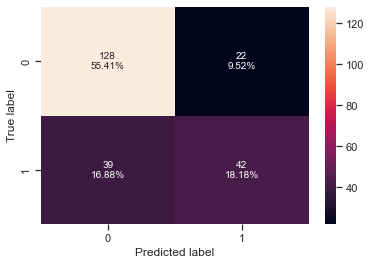

In [423]:
matrix_Ada_test=confusion_matrix_sklearn(Model_Ada, x_test, y_test)
matrix_Ada_test

### Observations:

- The Model_Ada is overfitted and the recall is very poor. 
- The confusion matrix shows almost 17 per cent of patient at risk of diabetes that have been misdiagnosted.

### 4.2 Model building using oversampling / SMOTE

In order to fix the imbalanced data, we are going to use the SMOTE method, so we will be creating data for the class with less weight representation. This way, we will not have to deal with class imbalance.

In [290]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

In [291]:
print(f'x_train before oversampling contains {x_train.shape[0]} rows and {x_train.shape[1]} columns')

x_train before oversampling contains 537 rows and 8 columns


In [292]:
print(f'x_train after oversampling contains {x_train_over.shape[0]} rows and {x_train_over.shape[1]} columns')

x_train after oversampling contains 700 rows and 8 columns


In [293]:
print(f'y_train before oversampling contains {y_train.shape} rows')

y_train before oversampling contains (537,) rows


In [294]:
print(f'y_train_over after oversampling contains {y_train_over.shape} rows')

y_train_over after oversampling contains (700,) rows


In [295]:
y_train.value_counts(normalize=True)

0    0.651769
1    0.348231
Name: Class, dtype: float64

In [296]:
y_train_over.value_counts(normalize=True)

1    0.5
0    0.5
Name: Class, dtype: float64

### Observations:
- The imbalanced data was solve by using the SMOTE method.
- SMOTE is a technique that permits us to create synthetic data for the imbalanced dataset. It will create data point by using the nearest neighbors technique (in this case we are using the nearest neighbors) for the class with less weight, in this case for class 1.

In [300]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))



results_over = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_over.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation Cost:

dtree: 0.7828571428571428
Logistic regression: 0.7628571428571429
Bagging: 0.7542857142857142
GradientBoosting: 0.8114285714285714
AdaBoost: 0.7828571428571429
RandomForest: 0.8428571428571429
XGBoost: 0.8485714285714285


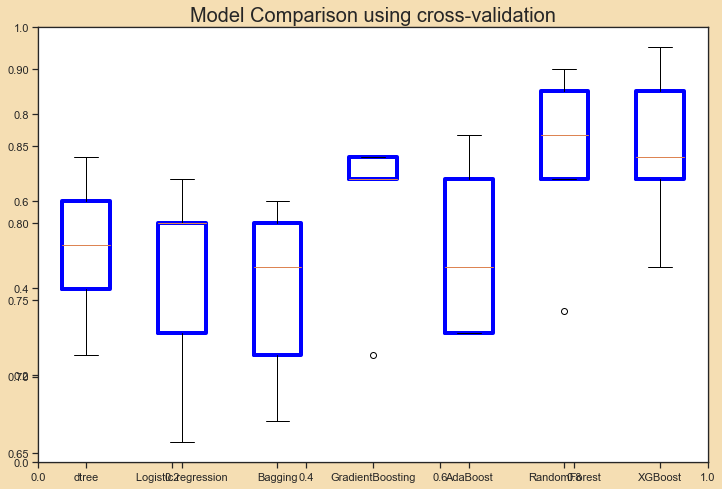

In [301]:
fig3=plt.figure(figsize=(12,8), facecolor='wheat')#setting plot size
plt.title('Model Comparison using cross-validation',fontsize=20)#adding title
ax3=fig3.add_subplot(111)# add plots on the same graph
bp_over=plt.boxplot(results_over)# plot cross validation results per model
ax3.set_xticklabels(names)#add name labels to each model
for box in bp_over['boxes']:
    box.set(color='blue', linewidth=4)

plt.show()

#### Observations:

- Oversampling seems to be a good way to improve performance.
- The models with better performance are XGBoost, random forest and Gradient boosting. Those are the models we are focus on and we will use hyperparameter tuning to find our final model.


### A. XGboost Algorithm: Model_XGB

In [534]:

Model_XGB = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [ 50, 20,100],'max_depth':[3,4],"colsample_bytree":[0.7,0.8] ,'eta':[0.3,0.7,0.5], 'gamma': [3,5,7],"reg_lambda":[0.3,0.4,0.01] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_XGB , param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'reg_lambda': 0.4, 'n_estimators': 20, 'max_depth': 3, 'gamma': 3, 'eta': 0.3, 'colsample_bytree': 0.7} with CV score=0.8428571428571429:


In [541]:
Model_XGB=XGBClassifier(random_state=1,eval_metric='logloss',colsample_bytree = 0.7,reg_lambda= 0.4, n_estimators= 20, max_depth= 3, eta= 0.3, gamma= 3)
eval_set = [(x_test, y_test)]
Model_XGB.fit(x_train_over,y_train_over,early_stopping_rounds=10, eval_set=eval_set)

[0]	validation_0-logloss:0.62562
[1]	validation_0-logloss:0.58764
[2]	validation_0-logloss:0.55556
[3]	validation_0-logloss:0.54603
[4]	validation_0-logloss:0.53160
[5]	validation_0-logloss:0.52297
[6]	validation_0-logloss:0.52121
[7]	validation_0-logloss:0.51863
[8]	validation_0-logloss:0.51528
[9]	validation_0-logloss:0.51091
[10]	validation_0-logloss:0.50729
[11]	validation_0-logloss:0.50784
[12]	validation_0-logloss:0.51004
[13]	validation_0-logloss:0.51534
[14]	validation_0-logloss:0.51448
[15]	validation_0-logloss:0.51722
[16]	validation_0-logloss:0.51915
[17]	validation_0-logloss:0.51800
[18]	validation_0-logloss:0.51788
[19]	validation_0-logloss:0.52010


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eta=0.3, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=0.4, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### MODEL PERFORMACE

In [542]:
Model_XGB_train=model_performance_classification_sklearn(Model_XGB, x_train_over,y_train_over)
Model_XGB_train

,Accuracy,Recall,Precision,F1
0,0.857143,0.877143,0.843407,0.859944


In [543]:
Model_XGB_test=model_performance_classification_sklearn(Model_XGB, x_test,y_test)
Model_XGB_test

,Accuracy,Recall,Precision,F1
0,0.735931,0.703704,0.606383,0.651429


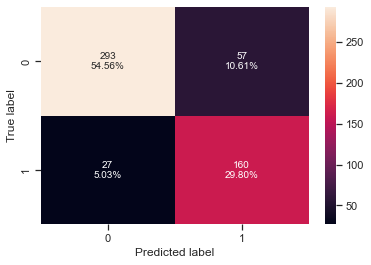

In [544]:
matrix_XGB_train=confusion_matrix_sklearn(Model_XGB, x_train, y_train)
matrix_XGB_train

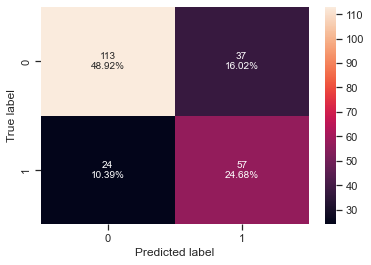

In [545]:
matrix_XGB_test=confusion_matrix_sklearn(Model_XGB, x_test, y_test)
matrix_XGB_test

#### Observations:

- XGboost algorithm on oversampling data is overfitting.
- Despite of use of different conservative parameters, the model is working very poorly on the test set and the train set is showing much better results.
- False negative reach 10 percent for the confusion matrix on the test set.

### B. Random forest: Model_RF

In [583]:
Model_RF = RandomForestClassifier(random_state=1)

param_grid={  
                'max_depth': list(np.arange(3,6,1)),
                'max_features': np.arange(0.6,0.8,0.1),
                'max_samples': [0.6,0.8,0.7],
                'min_samples_split': np.arange(10, 20, 5),
                'n_estimators': np.arange(30,70,60),
                'min_impurity_decrease': [0.05,0.01,0.1]}


randomized_cv = RandomizedSearchCV(estimator=Model_RF , param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'min_samples_split': 10, 'min_impurity_decrease': 0.01, 'max_samples': 0.8, 'max_features': 0.6, 'max_depth': 5} with CV score=0.8428571428571429:


In [584]:
Model_RF=RandomForestClassifier(random_state=1,n_estimators=30, min_samples_split= 10, min_impurity_decrease= 0.01, max_samples= 0.8, max_features=  0.6, max_depth= 5)
Model_RF.fit(x_train_over,y_train_over)

RandomForestClassifier(max_depth=5, max_features=0.6, max_samples=0.8,
                       min_impurity_decrease=0.01, min_samples_split=10,
                       n_estimators=30, random_state=1)

#### Model performance

In [585]:
Model_RF_train=model_performance_classification_sklearn(Model_RF, x_train_over,y_train_over)
Model_RF_train

,Accuracy,Recall,Precision,F1
0,0.834286,0.86,0.817935,0.83844


In [586]:
Model_RF_test=model_performance_classification_sklearn(Model_RF, x_test,y_test)
Model_RF_test

,Accuracy,Recall,Precision,F1
0,0.727273,0.716049,0.591837,0.648045


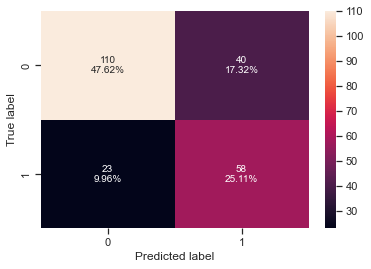

In [587]:
matrix_RF_test=confusion_matrix_sklearn(Model_RF, x_test, y_test)
matrix_RF_test

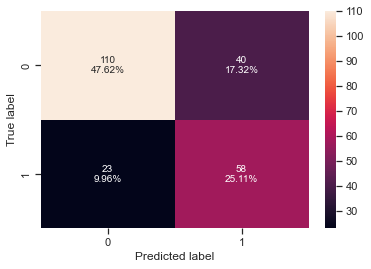

In [588]:
matrix_RF_test=confusion_matrix_sklearn(Model_RF, x_test, y_test)
matrix_RF_test

#### Observations:
- Random forest model in oversampling data is overfitting. 
- The recall is much better in the train set than in the test set.
- Confusion matrix shows almost 10 percent of false negatives, patients at risk of diabetes with misdiagnosis, for the test set.


## 5.Model comparison

In [591]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_estimator_train.T, Model_GB_train.T, Model_Ada_train.T,Model_XGB_train.T,Model_RF_train.T],axis=1,
)
models_train_comp_df.columns = [
    'Model Decision_tree',
    'Model Gradient_Boosting',
    'Model Adaboost',
    'Model XGboost_Overampling',
    'Model Random_Forest_oversampling'
    
]


In [593]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dtree_estimator_test.T, Model_GB_test.T, Model_Ada_test.T,Model_XGB_test.T,Model_RF_test.T],axis=1,
)
models_test_comp_df.columns = [
    'Model Decision_tree',
    'Model Gradient_Boosting',
    'Model Adaboost',
    'Model XGboost_Overampling',
    'Model Random_Forest_oversampling'
    
]


In [592]:
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Model Decision_tree,0.772812,0.882353,0.622642,0.730088
Model Gradient_Boosting,0.882682,0.796791,0.856322,0.825485
Model Adaboost,0.817505,0.684492,0.766467,0.723164
Model XGboost_Overampling,0.857143,0.877143,0.843407,0.859944
Model Random_Forest_oversampling,0.834286,0.860000,0.817935,0.838440


In [594]:
print("Testg performance comparison:")
models_test_comp_df.T

Testg performance comparison:


,Accuracy,Recall,Precision,F1
Model Decision_tree,0.722944,0.814815,0.573913,0.673469
Model Gradient_Boosting,0.735931,0.543210,0.647059,0.590604
Model Adaboost,0.735931,0.518519,0.656250,0.579310
Model XGboost_Overampling,0.735931,0.703704,0.606383,0.651429
Model Random_Forest_oversampling,0.727273,0.716049,0.591837,0.648045


#### Observations:
- As per the above results, we can conclude that decision tree with hypertuning shows the best performance.
- The highest recall is for dtree model and also the only model that did not overfit.

## 6. Final Model: Dtree Model

### Feature importance of tuned decision tree

In [597]:
# Text report showing the rules of a decision tree -
feature_names = list(x_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Glucose <= 123.50
|   |--- Insulin <= 116.40
|   |   |--- Pedigree <= 0.74
|   |   |   |--- weights: [56.70, 5.20] class: 0
|   |   |--- Pedigree >  0.74
|   |   |   |--- weights: [8.05, 4.55] class: 0
|   |--- Insulin >  116.40
|   |   |--- Age <= 28.50
|   |   |   |--- weights: [14.70, 3.90] class: 0
|   |   |--- Age >  28.50
|   |   |   |--- weights: [10.15, 20.15] class: 1
|--- Glucose >  123.50
|   |--- BMI <= 28.85
|   |   |--- Age <= 26.50
|   |   |   |--- weights: [8.05, 0.65] class: 0
|   |   |--- Age >  26.50
|   |   |   |--- weights: [7.00, 9.75] class: 1
|   |--- BMI >  28.85
|   |   |--- Glucose <= 154.50
|   |   |   |--- weights: [14.35, 36.40] class: 1
|   |   |--- Glucose >  154.50
|   |   |   |--- weights: [3.50, 40.95] class: 1



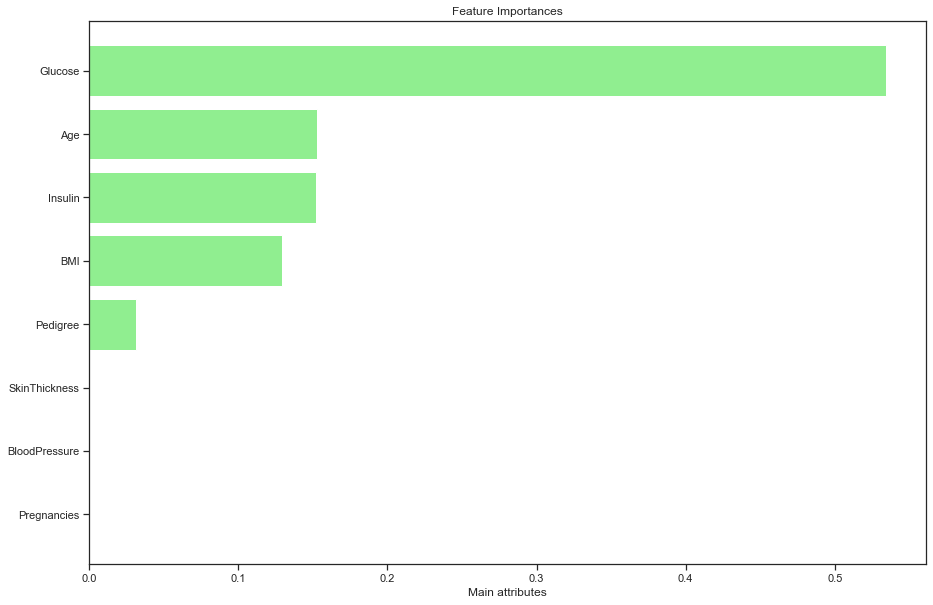

In [598]:
#plotting models importance features in descending order
feature_names = x_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Main attributes')
plt.show()

In [599]:
# importance of features of GB model

print(
    pd.DataFrame(
      dtree_estimator.feature_importances_*100, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                     Imp
Glucose        53.433294
Age            15.261201
Insulin        15.192743
BMI            12.937419
Pedigree        3.175342
Pregnancies     0.000000
BloodPressure   0.000000
SkinThickness   0.000000


#### Observations:
- Acording to our model, the main variable that are used to separate the model in individual at risk of diabetes and non at risk are: glucose with a weight in the model of more than 50 percent, age and insulin, both with a contribution to the model of 15 percent, BMI (body mass index) with 12 percent of the weight and pedigree with only 3 percent.
- The rest of the variables are not significant for the model.

### Conclusion



- Our final model shows that the variables that contribute to predict the risk of diabetes are Glucose, Insulin, Age, BMI and pedigree.
- This model is susceptible of improvement, and as we collect additional and additional variables, we can possibly enhance the performance of the model.
- Our model is indicating that women with less than 123 glucose level will be less prone to develop diabetes, only females with levels of insulin greater than 116 mu U/ml and older than 28 years old could be at risk of becoming diabetic. This group should check yearly for diabetes.
- Women's glucose  with level greater than 123 are at risk of developing diabetes, especially if their BMI is greater than 28.8 and they are older than 26 years old. This group should also take proper precautions and test for diabetes periodically. 
- Middle-aged to older women has a higher risk of diabetes independently of their weight. They should keep the glucose level in check.
- Overweight women have a higher risk of diabetes after 26 years old. They should keep take care of their diet and try to follow a healthy life style along with constant screening for diabetes.
